# TASK 1
# dataset - airlines_flights_data.csv
# Exploratory Data Analysis (EDA) on Airlines Flights Dataset

# Step 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
file_path = (r"C:\Users\verma\OneDrive\Documents\airlines_flights_data.csv")   # Change path if needed
df = pd.read_csv(file_path)

# Step 1. Ask meaningful questions


In [6]:
eda_questions = [
    "1. What are the most common airlines and routes?",
    "2. How do ticket prices vary by airline, source, destination, and class?",
    "3. Does departure time affect the price of tickets?",
    "4. How does the number of stops impact ticket prices and duration?",
    "5. How does the number of days left before departure influence prices?",
    "6. Are there any outliers or anomalies in flight duration or price?"
]
print("\n=== Key EDA Questions ===")
for q in eda_questions:
    print(q)



=== Key EDA Questions ===
1. What are the most common airlines and routes?
2. How do ticket prices vary by airline, source, destination, and class?
3. Does departure time affect the price of tickets?
4. How does the number of stops impact ticket prices and duration?
5. How does the number of days left before departure influence prices?
6. Are there any outliers or anomalies in flight duration or price?


# Step 2. Explore data structure


In [7]:
print("\n=== Dataset Info ===")
print(df.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [8]:
print("\n=== First 5 Rows ===")
print(df.head())



=== First 5 Rows ===
   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [9]:
print("\n=== Shape of Dataset ===")
print(df.shape)


=== Shape of Dataset ===
(300153, 12)


In [10]:
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [11]:
print("\n=== Data Types ===")
print(df.dtypes)



=== Data Types ===
index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


# Step 3. Summary Statistics


In [12]:
print("\n=== Summary Statistics ===")
print(df.describe(include="all"))



=== Summary Statistics ===
                index  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300153      300153         300153  300153   
unique            NaN        6    1561           6              6       3   
top               NaN  Vistara  UK-706       Delhi        Morning     one   
freq              NaN   127859    3235       61343          71146  250863   
mean    150076.000000      NaN     NaN         NaN            NaN     NaN   
std      86646.852011      NaN     NaN         NaN            NaN     NaN   
min          0.000000      NaN     NaN         NaN            NaN     NaN   
25%      75038.000000      NaN     NaN         NaN            NaN     NaN   
50%     150076.000000      NaN     NaN         NaN            NaN     NaN   
75%     225114.000000      NaN     NaN         NaN            NaN     NaN   
max     300152.000000      NaN     NaN         NaN            NaN     NaN   

       arrival_time destination_city    class  

# Step 4. Univariate Analysis

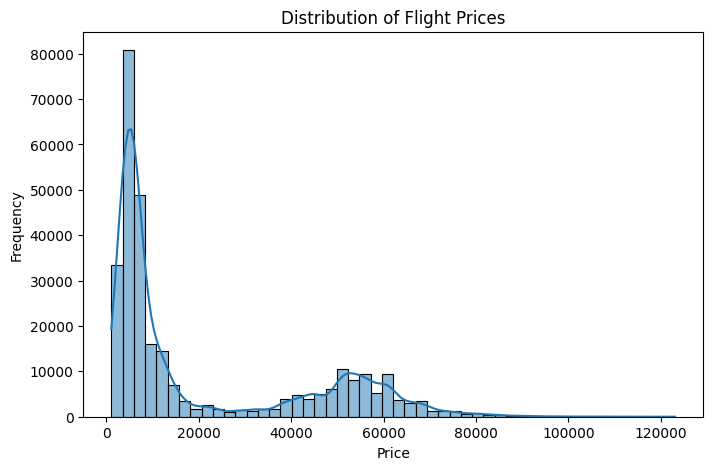

In [13]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


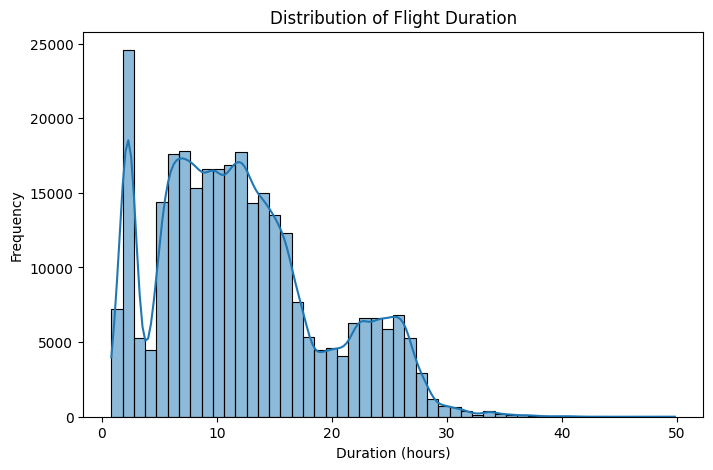

In [14]:
# Duration distribution
plt.figure(figsize=(8,5))
sns.histplot(df["duration"], bins=50, kde=True)
plt.title("Distribution of Flight Duration")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.show()

# Step 5. Categorical Analysis

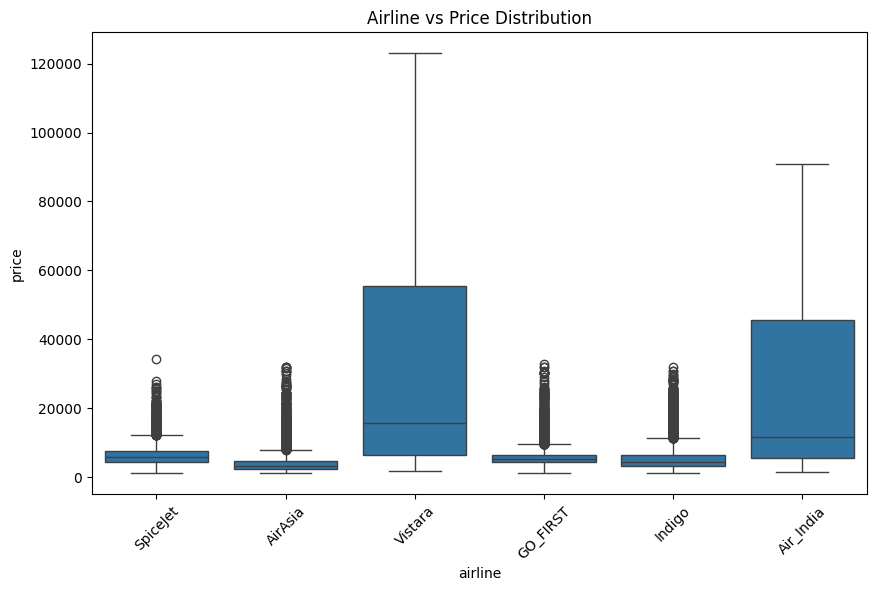

In [15]:
# Airline vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x="airline", y="price", data=df)
plt.title("Airline vs Price Distribution")
plt.xticks(rotation=45)
plt.show()

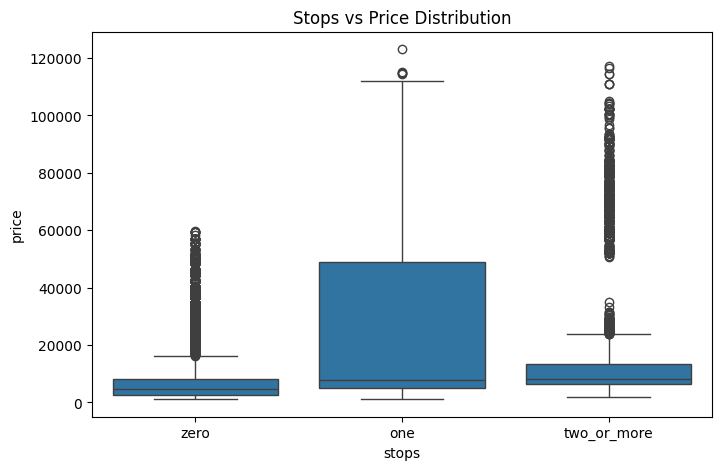

In [16]:
# Stops vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x="stops", y="price", data=df)
plt.title("Stops vs Price Distribution")
plt.show()

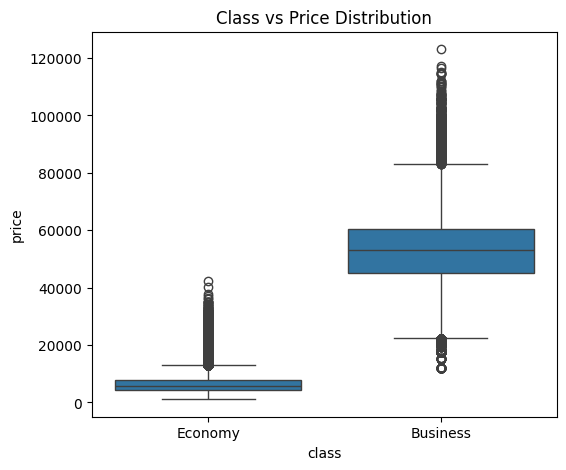

In [17]:
# Class vs Price
plt.figure(figsize=(6,5))
sns.boxplot(x="class", y="price", data=df)
plt.title("Class vs Price Distribution")
plt.show()

# Step 6. Bivariate Analysis

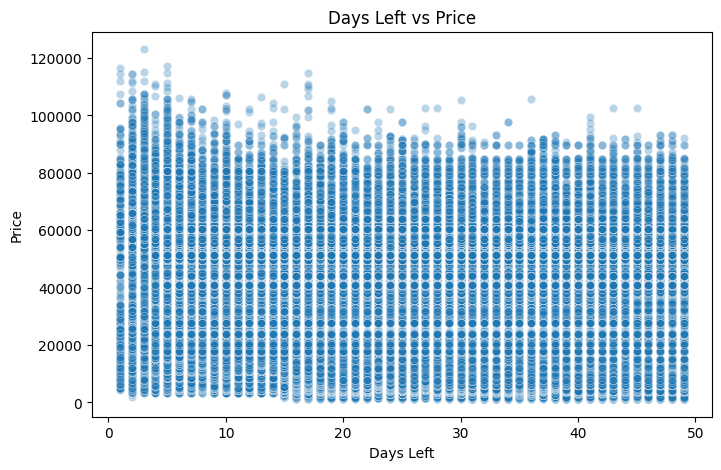

In [18]:
# Days left vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="days_left", y="price", data=df, alpha=0.3)
plt.title("Days Left vs Price")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()

# Step 7. Correlation Analysis

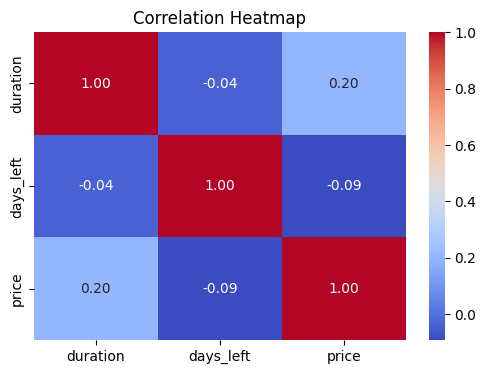

In [19]:
# 7. Correlation Analysis
# -------------------------------
correlation_matrix = df[["duration", "days_left", "price"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
print("\n=== Correlation Matrix ===")
print(correlation_matrix)



=== Correlation Matrix ===
           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


# Step 8. Detect anomalies

In [21]:
# Checking unusually high prices
high_price_flights = df[df["price"] > 100000]
print("\n=== High Price Flights (Potential Anomalies) ===")
print(high_price_flights.head())


=== High Price Flights (Potential Anomalies) ===
         index  airline  flight source_city departure_time        stops  \
215858  215858  Vistara  UK-809       Delhi        Evening  two_or_more   
215859  215859  Vistara  UK-809       Delhi        Evening  two_or_more   
216025  216025  Vistara  UK-817       Delhi        Evening  two_or_more   
216095  216095  Vistara  UK-963       Delhi        Morning          one   
216096  216096  Vistara  UK-811       Delhi  Early_Morning  two_or_more   

       arrival_time destination_city     class  duration  days_left   price  
215858      Evening          Kolkata  Business     21.08          1  114434  
215859      Evening          Kolkata  Business     21.08          1  116562  
216025      Morning          Kolkata  Business     17.58          4  100395  
216095      Evening          Kolkata  Business      8.00          5  101369  
216096      Evening          Kolkata  Business     10.92          5  117307  


In [22]:
# Checking unusually long durations
long_duration_flights = df[df["duration"] > 30]
print("\n=== Long Duration Flights (Potential Anomalies) ===")
print(long_duration_flights.head())


=== Long Duration Flights (Potential Anomalies) ===
     index    airline  flight source_city departure_time stops arrival_time  \
114    114  Air_India  AI-429       Delhi        Morning   one    Afternoon   
357    357  Air_India  AI-429       Delhi        Morning   one    Afternoon   
546    546  Air_India  AI-429       Delhi        Morning   one    Afternoon   
724    724  Air_India  AI-429       Delhi        Morning   one    Afternoon   
907    907  Air_India  AI-429       Delhi        Morning   one    Afternoon   

    destination_city    class  duration  days_left  price  
114           Mumbai  Economy     30.08          1  24540  
357           Mumbai  Economy     30.08          3  15405  
546           Mumbai  Economy     30.08          4  15720  
724           Mumbai  Economy     30.08          5  15405  
907           Mumbai  Economy     30.08          6  15405  
